In [3]:
#importing library

In [4]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#cek version tensorflow

In [6]:
tf.__version__

'2.15.0'

In [7]:
#train image processing

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 3409 images belonging to 5 classes.


In [9]:
#test image processing

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1944 images belonging to 5 classes.


In [11]:
#Building Model

In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
#Building Convolution Layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [17]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Dense(units=5 , activation='softmax'))

In [20]:
cnn.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [33]:
history = cnn.fit(x = training_set , validation_data = test_set , epochs = 30)

Epoch 1/30
107/107 [==============================] - 14s 130ms/step - loss: 0.3820 - accuracy: 0.8630 - val_loss: 0.5914 - val_accuracy: 0.8215
Epoch 2/30
107/107 [==============================] - 15s 141ms/step - loss: 0.3878 - accuracy: 0.8645 - val_loss: 0.5632 - val_accuracy: 0.8138
Epoch 3/30
107/107 [==============================] - 15s 140ms/step - loss: 0.3745 - accuracy: 0.8709 - val_loss: 0.5048 - val_accuracy: 0.8462
Epoch 4/30
107/107 [==============================] - 15s 136ms/step - loss: 0.3557 - accuracy: 0.8733 - val_loss: 0.4804 - val_accuracy: 0.8611
Epoch 5/30
107/107 [==============================] - 15s 139ms/step - loss: 0.3762 - accuracy: 0.8642 - val_loss: 0.4409 - val_accuracy: 0.8719
Epoch 6/30
107/107 [==============================] - 15s 142ms/step - loss: 0.3538 - accuracy: 0.8742 - val_loss: 0.4830 - val_accuracy: 0.8755
Epoch 7/30
107/107 [==============================] - 15s 137ms/step - loss: 0.3524 - accuracy: 0.8753 - val_loss: 0.4907 - val_ac

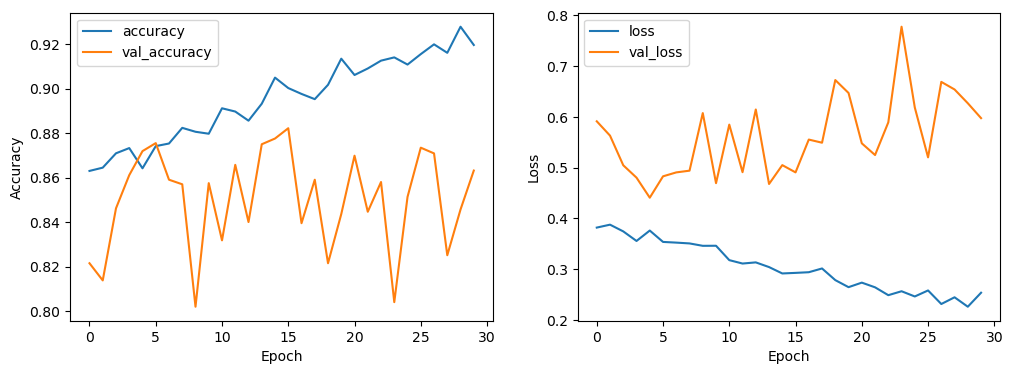

Test loss: 0.5976232886314392
Test accuracy: 0.8631687164306641


In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

score = cnn.evaluate(test_set, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
#Preprocessing New Image

In [45]:
from keras.preprocessing import image

ori_image = image.load_img('Prediction/Unknown.jpeg',target_size=(64,64))
test_image = image.img_to_array(ori_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
training_set.class_indices
print(result)


1/1 [==============================] - 0s 13ms/step
[[0. 0. 0. 1. 0.]]


In [23]:
#cek

SunFlower


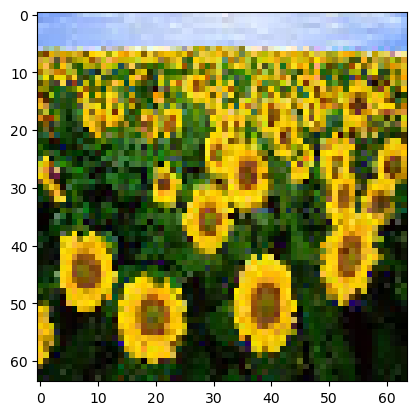

In [46]:
if result[0][0]==1:
    print('Daisy')
    plt.imshow(ori_image)
elif result[0][1]==1:
    print('Dandelion')
    plt.imshow(ori_image)
elif result[0][2]==1:
    print('Rose')
    plt.imshow(ori_image)
elif result[0][3]==1:
    print('SunFlower')
    plt.imshow(ori_image)
elif result[0][4]==1:
    print("Tulip")
    plt.imshow(ori_image)


In [ ]:
print(result)